## Data Dictionary


There are five tables in the dataset, and you'll need to use all of them for data preprocessing and exploratory data analysis. Below is a data dictionary that lists the columns of each table and describes the data they contain.

- `instacart_orders.csv`: Each row corresponds to an order in the Instacart app.

'order_id': Unique ID number that identifies each order.

'user_id': Unique ID number that identifies each customer's account.

'order_number': The number of times this customer has placed an order.

'order_dow': The day of the week the order was placed (0 if Sunday).

'order_hour_of_day': The time of day the order was placed.

'days_since_prior_order': The number of days since the customer made their previous order.

- `products.csv`: Each row corresponds to a unique product that customers can buy.

'product_id': Unique ID number that identifies each product.

'product_name': Name of the product.

'aisle_id': Unique ID number that identifies each grocery aisle category.

'department_id': Unique ID number that identifies each grocery department.

- `order_products.csv`: Each row corresponds to an item ordered in an order.

'order_id': Unique ID number that identifies each order.

'product_id': Unique ID number that identifies each product.

'add_to_cart_order': The sequential order in which each item was added to the cart.

'reordered': 0 if the customer has never ordered this product before, 1 if they have ordered it.

- `aisles.csv`:

'aisle_id': Unique ID number that identifies each grocery aisle category.

'aisle': Name of the aisle.

- `departments.csv`:

'department_id': Unique ID number that identifies each grocery department.

'department': Name of the department.

# Paso 1. Import libraries and datasets. 


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
instacart_orders= pd.read_csv('/Users/pauli/Documents/Data/instacart_project/instacart_orders.csv', sep=';')
products= pd.read_csv('/Users/pauli/Documents/Data/instacart_project/products.csv', sep=';')
aisles= pd.read_csv('/Users/pauli/Documents/Data/instacart_project/aisles.csv', sep=';')
departments= pd.read_csv('/Users/pauli/Documents/Data/instacart_project/departments.csv', sep=';')
order_products= pd.read_csv('/Users/pauli/Documents/Data/instacart_project/order_products.csv', sep=';')

In [4]:
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [8]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


After observing the data, it is concluded that the data delimiter is ;. It can also be deduced that there are missing values, which we will address later. The data types are integers and strings.

# Step 2. Data Preprocessing

Preprocess the data as follows:

-Verify and correct data types (for example, ensure that ID columns are integers).

-Identify and fill missing values.

-Identify and remove duplicate values.

## Find and Remove Duplicate Values

### `instacart_orders` data frame

In [52]:
print(instacart_orders[instacart_orders.duplicated()])
print (instacart_orders.duplicated().sum())


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
0


We have 15 duplicate rows in this DataFrame, and they share the same day of the week and time of day when the order was placed.

Based on the findings, we will check all orders made on Wednesday at 2:00 AM.

In [53]:
wed_orders= instacart_orders[(instacart_orders['order_dow']== 3) & (instacart_orders['order_hour_of_day']== 2)]

wed_orders


                            

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


**What does this result suggest?:** Indeed, the duplicates appear on the same day and time, suggesting there was some system failure that recorded the duplicate orders.

In [54]:
instacart_orders= instacart_orders.drop_duplicates()

In [55]:
instacart_orders[instacart_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [ ]:
instacart_orders['order_id'].duplicated().sum()
# Recheck if there are duplicated order IDs

0

There are no implicit duplicates.

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas

print (products.duplicated().sum())

0


In [15]:
# Verifica si hay IDs duplicadas de productos
print (products['product_id'].duplicated().sum())

0


In [16]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

print (products['product_name'].str.upper().duplicated().sum())


1361


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes 
(products[~products['product_name'].isna()]['product_name'].str.upper().duplicated().sum())


104

De los 1361 duplicados que hay, 104 son realmente duplicados de nombres de productos. Sin embargo, desde que el product id no sea duplicado, estos duplicados no representan un problema para el análisis. 

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas

print (departments.duplicated().sum())

0


In [19]:
# Revisa si hay IDs duplicadas de productos

print (departments['department_id'].duplicated().sum())

0


No hay duplicados en los departamentos, por lo que por ahora no hay que hacer modificaciones a este DataFrames. 

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print (aisles.duplicated().sum())

0


In [21]:
# Revisa si hay IDs duplicadas de productos

print (aisles['aisle_id'].duplicated().sum())

0


No hay duplicados en los aisles, por lo que por ahora no hay que hacer modificaciones a este DataFrames. 

### `order_products` data frame

In [22]:

print (order_products.duplicated().sum())


0


In [23]:
order_products[['order_id', 'product_id']].duplicated().sum()

0

No hay duplicados implicitos. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
print (products['product_name'].isna().sum())
print (products[products['product_name'].isna()])

1258
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Hay 1258 valores ausentes en el nombre de los productos y parece que estan relacionados al pasillo 100 y al departamento 21. 

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

products[(products['product_name'].isna()) & (products['aisle_id']!=100)]


,product_id,product_name,aisle_id,department_id


Si, todos los valores ausentes se encuentran en el pasillo con ID 100, ya que no aparecen valores ausentes en otras filas que no sea la del pasillo 100.

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[(products['product_name'].isna()) & (products['department_id']!=21)]

,product_id,product_name,aisle_id,department_id


Si, todos los valores ausentes se encuentran relacionados al departamento con ID 21.

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

aisle_100= aisles[aisles['aisle_id']==100]

dept_21= departments[departments['department_id']==21]

print (aisle_100)
print ()
print (dept_21)

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


Tanto el nombre del pasillo como del departamento son datos faltantes.

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'

products['product_name'].fillna('Unknown', inplace=True)

print (products['product_name'].isna().sum())


0


Utilicé el método fillna para reemplazar valores ausentes en la columna product name.

### `orders` data frame

In [29]:
# Encuentra los valores ausentes
print (instacart_orders['days_since_prior_order'].isna().sum())

print (instacart_orders[instacart_orders['days_since_prior_order'].isna()])

28817
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100               

In [30]:
instacart_orders[(instacart_orders['days_since_prior_order'].isna()) & (instacart_orders['order_number']!=1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


No, todos los NaN que se muestran son el primer pedido del cliente.

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
print (order_products['add_to_cart_order'].isna().sum())
print (order_products[order_products['add_to_cart_order'].isna()])

836
         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

min_add_to_cart_order= order_products['add_to_cart_order'].min()

max_add_to_cart_order= order_products['add_to_cart_order'].max()

print (min_add_to_cart_order)
print (max_add_to_cart_order)

1.0
64.0


Al parecer las ordenes van de 1 hasta 64 productos. 

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

orders_with_nan = order_products[(order_products['add_to_cart_order'].isna())]['order_id']

print (orders_with_nan)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
df_grupo = order_products[order_products['order_id'].isin(orders_with_nan)]


# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


id_grouped= df_grupo.groupby('order_id')['product_id'].count()
print (id_grouped.min())

65


Realmente los pedidos pueden tener mas de 64 productos, si se cuentan los que tienen NaN in add to cart order.

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)

order_products['add_to_cart_order']= order_products['add_to_cart_order'].astype('int')

print (order_products['add_to_cart_order'].isna().sum())

0


/var/folders/cq/bs731p7n52x64481gqr1xjvm0000gn/T/ipykernel_53332/3974100769.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_products['add_to_cart_order'].fillna(999, inplace=True)


Utilicé el método fillna, y el astype para convertir la columna a enteros, al final verifiqué que hayan quedado bien reemplazados con isna y sum.

## Conclusiones

A pesar de haber duplicados y valores ausentes, podemos observar que no era necesario deshacerse de todos porque por la naturaleza de los datos recolectados, es completamente normal y dejarlos no entorpece el análisis. 

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

### Verifica que los valores sean sensibles

In [36]:
print (instacart_orders['order_hour_of_day'].min())
print (instacart_orders['order_hour_of_day'].max())

0
23


In [37]:
print (instacart_orders['order_dow'].min())
print (instacart_orders['order_dow'].max())

0
6


Los mínimos y máximos de cada columna son razonables. 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<Axes: title={'center': 'Number of users who order per hour.'}, xlabel='Hour of day'>

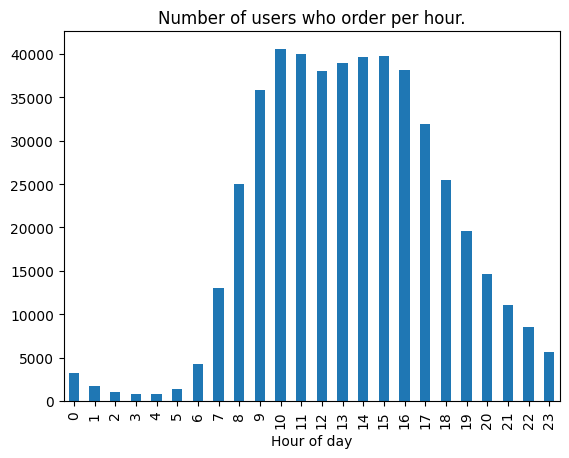

In [38]:


instacart_orders.groupby('order_hour_of_day')['user_id'].count().plot(kind = 'bar', title = 'Number of users who order per hour.', xlabel= 'Hour of day', y= 'Number of users.')

El mayor flujo de personas realizando pedidos se encuentra entre las 10 de la mañana y empieza a decrecer a las 4 de la tarde. 

### [A3] ¿Qué día de la semana compran víveres las personas?

<Axes: title={'center': 'Number of users who purchase per day of the week'}, xlabel='Day of the week', ylabel='Number of users'>

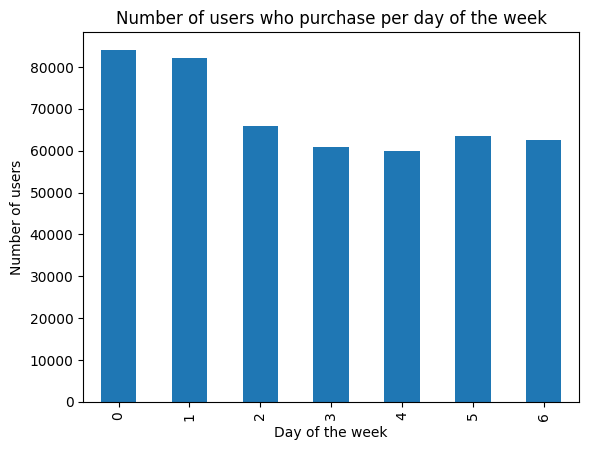

In [39]:
instacart_orders.groupby('order_dow')['user_id'].count().plot(kind='bar', title= 'Number of users who purchase per day of the week', ylabel= 'Number of users', xlabel= 'Day of the week')

Los dias que mas compras se realizan son el domingo y el lunes. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<Axes: title={'center': 'Days in between orders'}, xlabel='days_since_prior_order'>

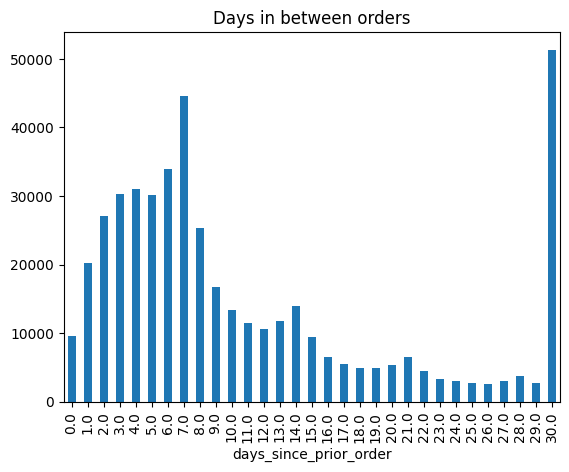

In [40]:
instacart_orders.groupby('days_since_prior_order')['user_id'].count().plot(kind='bar', title='Days in between orders')

Alrededor de 10.000 usuarios ordenan todos los dias y la mayoria de los usuarios (50.000), puede dejar pasar 30 dias sin hacer un pedido. 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

<Axes: title={'center': 'Wednesday vs. Saturday orders per hour'}, xlabel='Hour of day', ylabel='Number of users'>

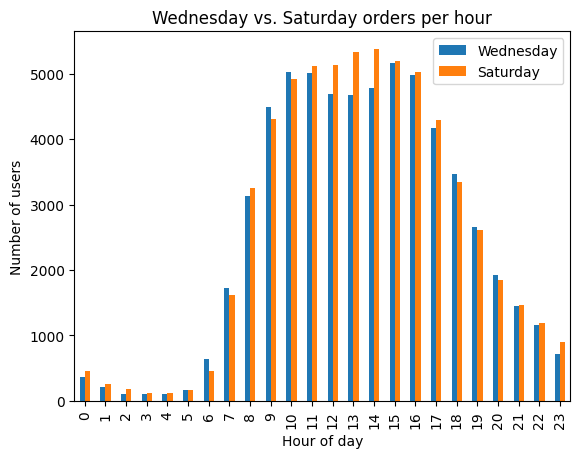

In [41]:
wednesday= instacart_orders[instacart_orders['order_dow']== 3].groupby('order_hour_of_day')['order_id'].count()
saturday= instacart_orders[instacart_orders['order_dow']== 6].groupby('order_hour_of_day')['order_id'].count()

days_comparative= pd.concat([wednesday, saturday], axis=1)
days_comparative.columns= ['Wednesday', 'Saturday']

days_comparative.plot(kind='bar', title= 'Wednesday vs. Saturday orders per hour', xlabel= 'Hour of day', ylabel= 'Number of users')

Las ordenes de los Miercoles y Sabados por horas del dia son bastante similares, a excepcion de las horas entre las 11am y 2pm, donde las del Sábado son un poco mayores. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<Axes: title={'center': 'Number of orders per client'}, xlabel='Number of orders', ylabel='Number of clients'>

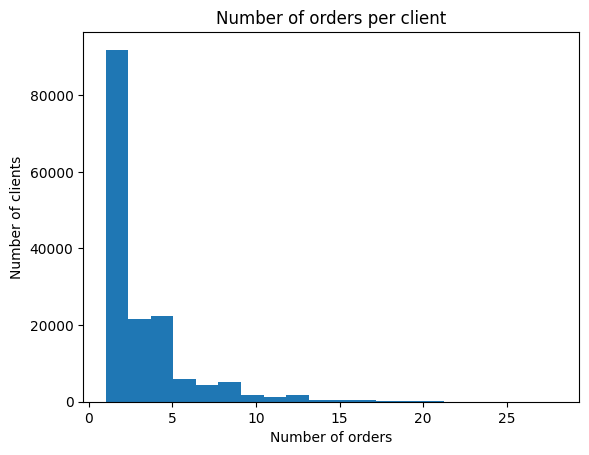

In [42]:
instacart_orders.groupby('user_id')['order_id'].count().plot(kind='hist', title= 'Number of orders per client', xlabel= 'Number of orders', ylabel= 'Number of clients', bins= 20)

La mayoría de usuarios ha realizado un solo pedido (más de 8.000 usuarios), que en este caso sería el valor máximo, y la cantidad va disminuyendo, hasta llegar al valor mínimo, que sería el usuario que menos pedidos ha hecho, ha sido aproximadamente 10 pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [43]:
order_filter= order_products.merge(products, on='product_id')
order_filter.groupby (['product_id', 'product_name'])['order_id'].count().sort_values(ascending= False).head(20)

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: order_id, dtype: int64

Los productos mas pedidos son frutas y verduras, el mas pedido es la banana.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

<Axes: title={'center': 'Number of articles ordered per person in one order'}, xlabel='Number of articles', ylabel='Number of users'>

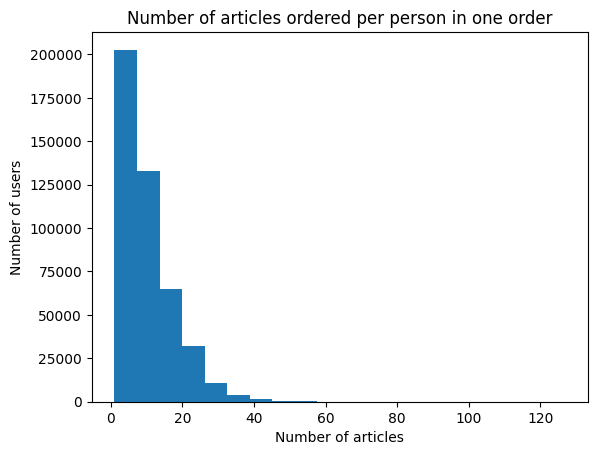

In [44]:
order_products.groupby('order_id')['product_id'].count().plot(kind='hist', title= 'Number of articles ordered per person in one order', ylabel= 'Number of users', xlabel= 'Number of articles', bins= 20)

Alrededor de 20.000 usuarios tienen pedidos pequeños, entre 1 y 5 productos, alrededor de 13.000 usuarios tienen pedidos entre 5 y 15 productos, y menos de 25.000 usuarios tienen pedidos entre los 25 y 45 productos. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [45]:
filter_reorder= order_filter[order_filter['reordered']== 1]

In [46]:
filter_reorder.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending= False).head(20)

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: order_id, dtype: int64

Aunque tiene algunas diferencias, este resultado es bastante parecido al anterior, lo que quiere decir que los productos mas pedidos tambien son los que mas se vuelven a pedir.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [47]:
products_proportion= order_products.groupby('product_id').agg(total_orders= ('order_id', 'count'), total_reorder= ('reordered', 'sum'))

In [48]:
products_proportion['proportion']= products_proportion['total_reorder']/ products_proportion['total_orders']

print (products_proportion)

            total_orders  total_reorder  proportion
product_id                                         
1                    280            158    0.564286
2                     11              0    0.000000
3                     42             31    0.738095
4                     49             25    0.510204
7                      2              1    0.500000
...                  ...            ...         ...
49690                  5              4    0.800000
49691                 72             31    0.430556
49692                 12              5    0.416667
49693                 25             11    0.440000
49694                  9              3    0.333333

[45573 rows x 3 columns]


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [49]:
clients_proportion= order_products.merge(instacart_orders, on= 'order_id')
clients_proportion.groupby('user_id')['reordered'].mean()

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

Como la columna reordered es binaria, se puede usar mean en este caso y el resultado no cambia.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [50]:
first_added_to_cart= order_filter[order_filter['add_to_cart_order']== 1]
first_added_to_cart.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending= False).head(20)

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

La lista es parecida a los productos mas pedidos y que vuelven a pedir, es consistente con esta informacion y hace sentido que asi sea. 

### Conclusion general del proyecto:

Los datos necesitaron una limpieza por duplicados y valores ausentes, sin embargo la informacion restante fue util para analizar las preguntas pertinentes. En general, se puede observar que la empresa tiene ordenes consistentes durante toda la semana, el mayor volumen de pedidos se hace hacia las horas del medio dia y principios de la tarde.
Por otro lado, los productos predominantes en los distintos análisis corresponden a productos de origen natural, especialmente frutas y verduras. 
La tasa de reordenes por cliente en general no es tan alta en comparacion a la cantidad de clientes, por lo que es un punto de oportunidad a revisar por la empresa para aplicar estrategias que hagan que esta sea mas alta. 